
# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

This dataset from The Movie Database (TMDb) contains detailed information about thousands of movies, including things like movie ID, IMDb ID, popularity score, budget, revenue, title, cast, homepage, director, tagline, keywords, summary, runtime, genres, production companies, release date, vote count, average rating, release year, and adjusted budget and revenue. Each column gives insight into the movie's finances, popularity, production, and reviews, helping us analyze what makes a movie successful. The ID acts as a unique identifier, and the data can show how factors like budget, cast, or production company affect ratings and earnings. This setup allows us to explore trends among successful movies. 


### Question(s) for Analysis
This analysis will explore how movie ratings are connected to factors like budget, genre, and production company to understand what affects ratings the most. By looking at these factors, we can spot trends and traits common in highly-rated films.

Some key questions to think about include:

**Do certain genres tend to get higher ratings from audiences?**

**How does the release year affect the average vote count for each movie?**

These questions will shape the analysis, helping us uncover patterns that may predict a movie's rating. 

# <a id='wrangling'></a>
## Data wrangling
First, I check the size of the DataFrame to see how many rows and columns it contains. Then, I look for duplicate rows to make sure there aren’t any repeated entries. After that, I examine the data types of each column to confirm they’re appropriate for analysis. I also check for any missing values throughout the dataset. Reviewing summary statistics gives me a quick overview and helps spot potential outliers. Finally, I gather a summary of the DataFrame, including data types and the count of non null values in each column, which gives me a solid understanding of the dataset’s structure and quality.
### Data Cleaning
To clean the dataset, I start by removing any duplicate rows so that each movie only appears once. Then, I fill in the missing values in different columns with placeholders like 'None', 'Unknown', or 'No information'. For columns such as genres, cast, and production_companies, which have multiple values separated by a pipe (|), I change these into lists to make them easier to work with. Lastly, I make sure the release_date column has the correct format by converting it into a proper date. This process helps make the data clean and ready for analysis. 

In [1]:
#We Load the data and print out a few lines.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('tmdb-movies.csv')
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [2]:
print("Dataframe size:", df.shape)#What is the size of your dataframe? 

Dataframe size: (10866, 21)


In [3]:
print("Data types:\n", df.dtypes)# Print the data types of each column in the DataFrame 'df'

Data types:
 id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [4]:
print("Missing values:\n", df.isnull().sum())#see which column have missing value

Missing values:
 id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [5]:
print("Duplicate rows:", df.duplicated().sum())#see if are we have mising value

Duplicate rows: 1


In [6]:
print("Summary statistics:\n", df.describe())#discrep of our data frame
df.info() #discribe and info can give us small summary about our data from

Summary statistics:
                   id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058     

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# as we seen in upper code we have 1 duplicate so first we need to drop it 
df.drop_duplicates(inplace=True)

In [8]:
#Remove duplicate movies by keeping only one for each imdb_id 
df.drop_duplicates(subset=['imdb_id','id'], inplace=True)

In [9]:
# Fill missing values for specific columns
df['director'].fillna('None', inplace=True)
df['production_companies'].fillna('Unknown', inplace=True)
df['imdb_id'].fillna('Unknown', inplace=True)
df['homepage'].fillna('No homepage', inplace=True)
df['tagline'].fillna('No tagline', inplace=True)
df['keywords'].fillna('No keywords', inplace=True)
df['overview'].fillna('No overview', inplace=True)

In [10]:
# In this dataset, certain columns like 'cast' and 'genres' contain multiple values
# separated by pipe (|) characters. After further review, I noticed that the 
# 'production_companies' column has a similar structure. To make the data easier 
# to work with, I converted these columns into lists.
# Using a lambda function, each cell is split by the '|' character to create a list.
# If a cell is empty or null, it is converted to an empty list instead.

def convert_pipe_to_list(df, columns):
    """
    Converts pipe-separated strings in specified columns to lists. 
    If a cell is null, it assigns an empty list.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to apply the transformation.
    """
    for column in columns:
        df[column] = df[column].apply(lambda x: x.split('|') if isinstance(x, str) else [])

In [11]:
# Define the columns to transform
columns_to_convert = ['genres', 'cast', 'production_companies']
# Convert pipe-separated strings to lists
convert_pipe_to_list(df, columns_to_convert)

In [12]:
#fxi type of the coulmns
df['release_date'] = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis
In this section, we will examine the data to answer the research questions outlined in the introduction. Our goal is to identify trends in audience ratings across different genres and analyze how the release year affects the average vote count. To achieve this, we will employ various visualizations to reveal patterns and relationships within the dataset. Specifically, we aim to answer the following questions:

**Do certain genres tend to receive higher ratings from audiences?**

**How does the release year impact the average vote count for each movie?**

We will use bar charts, line plots, and other visual tools to thoroughly explore and document these trends.

In [17]:

def plot_by_group(df, group_col, value_col, title, x_label, y_label, plot_type='line', figsize=(12, 6)):
    """
    Plots the average of a value column grouped by a specified column with default styling.

    Parameters:
        df (DataFrame): The input data frame.
        group_col (str): The column to group by (e.g., 'release_year').
        value_col (str): The column to calculate the average of (e.g., 'vote_count').
        title (str): The title of the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        plot_type (str): The type of plot (default is 'line').
        figsize (tuple): The size of the plot (default is (12, 6)).
    """
    # Group by the specified column and calculate the mean for the value column
    grouped_data = df.groupby(group_col)[value_col].mean()

    # Set the figure size
    plt.figure(figsize=figsize)

    # Generate the plot with standard styling
    grouped_data.plot(
        kind=plot_type, 
        color='green', 
        linewidth=2,                
    )

    # Add titles, labels, and grid
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)               # Enable grid by default

    # Display the plot
    plt.show()

# **Research Question 1: Do certain genres tend to get higher ratings from audiences?**

To explore if certain genres are more favored by audiences, we calculate the average audience rating for each genre and plot these averages.

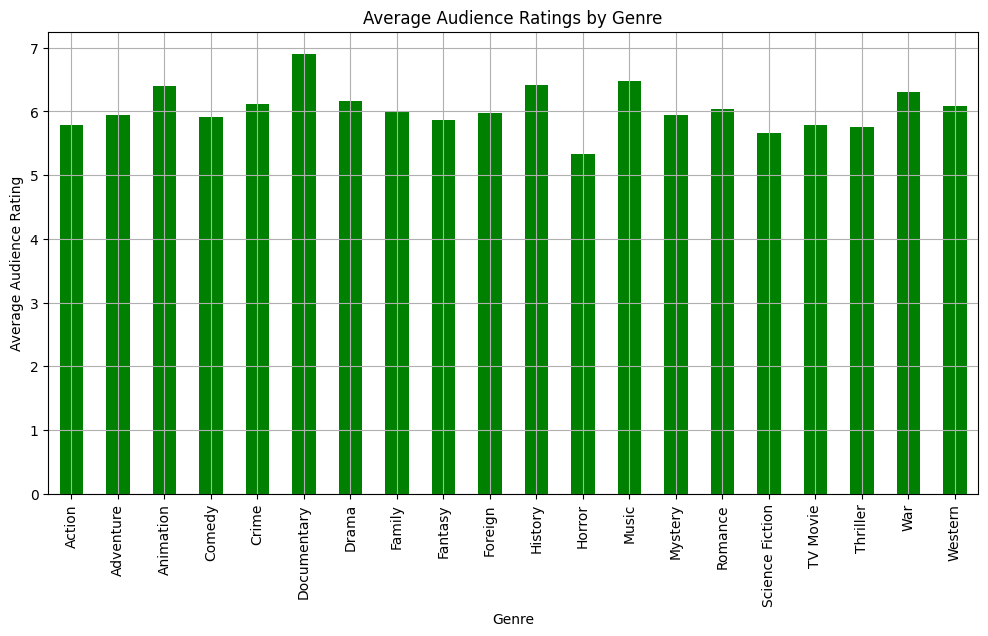

In [14]:
# Explode genres and calculate average ratings by genre
df_1 = df.explode('genres')

plot_by_group(
    df_1, 
    group_col='genres', 
    plot_type='bar', 
    value_col='vote_average', 
    title='Average Audience Ratings by Genre', 
    x_label='Genre', 
    y_label='Average Audience Rating'
)


**Explanation why bar plot:**

The bar plot allows us to quickly compare the average ratings across genres. This visualization helps in identifying which genres tend to receive higher ratings from audiences and which ones are generally rated lower. Such trends may reflect audience preferences for certain types of storytelling or themes associated with specific genres


# # Research Question 2  (How does the release year affect the average vote count (vote_count) for each movie?)
Next, we examine how the average vote count per movie has changed over time. This analysis may reveal if newer movies receive more engagement from viewers, possibly due to the ease of online rating systems.

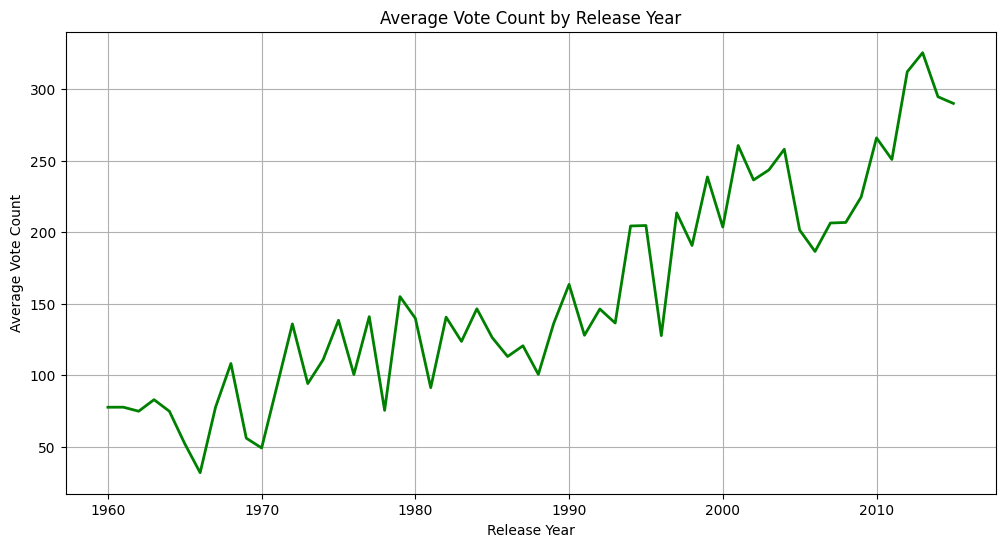

In [15]:
plot_by_group(
    df, 
    group_col='release_year', 
    value_col='vote_count', 
    title='Average Vote Count by Release Year', 
    x_label='Release Year', 
    y_label='Average Vote Count'
)

### Explanation :
This line plot illustrates how the average vote count for movies has evolved over the years. By examining this trend, we can infer how audience engagement (in terms of voting activity) has changed, potentially influenced by factors like the rise of online rating platforms or social media. This can provide insights into the popularity and accessibility of movie-rating systems over different decades.



<a id='conclusions'></a>
## Conclusions

Our analysis offers meaningful insights into how factors like genre and release year are tied to audience ratings and engagement:

>**Audience Ratings by Genre:**  
The bar chart of average ratings by genre shows that certain genres—like History, War, and Western—tend to receive higher average ratings from viewers. These genres often emphasize storytelling and emotional depth, resonating well with audiences. Conversely, genres like Horror generally have lower average ratings, possibly due to their polarizing nature and varied audience expectations. This suggests that genres with rich narratives or unique appeal factors might generally connect better with audiences.

>**Impact of Release Year on Vote Count:**  
The line plot of average vote counts by release year reveals a clear upward trend in audience engagement over time, with a noticeable jump after the early 2000s and a peak around 2015. This trend likely reflects the growing accessibility of online movie rating platforms, allowing audiences to share their opinions more easily. It appears that newer movies receive more votes on average, possibly due to the widespread use of social media and digital platforms in promoting movies and encouraging audience interaction.

<a id='Limitations'></a>
## Limitations
While our analysis reveals key trends, there are some limitations to consider:

- **Dataset Scope:** The data is limited to movies listed on TMDb, which might not fully represent all genres or global markets, potentially leading to sampling biases.
- **Multiple Genres:** Many movies belong to multiple genres, making it challenging to isolate the influence of a single genre on ratings.
- **External Influences:** Ratings and vote counts are affected by factors outside this dataset, such as cultural trends, regional preferences, and streaming availability, which aren’t accounted for here.
- **Time Influence on Vote Counts:** Although vote counts increase over time, this is also impacted by the rise of digital platforms. Our analysis doesn’t factor in the role of social media and targeted marketing, which likely influence audience engagement as well.

Despite these limitations, this analysis offers a foundation for understanding trends that can affect a movie’s audience success. Future research could broaden this perspective by incorporating more diverse datasets or considering additional elements, like social media sentiment or box office performance, to deepen these insights.

In [16]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 445585 bytes to Investigate_a_Dataset.html
